<a href="https://colab.research.google.com/github/AbrahamOtero/MLiB/blob/main/2_TransformData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Data transformation

##Set up

We import the libraries that we are going to need

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##Some theroy about Sklearn

In scikit-learn the concepts of **estimators**, **transformers**, and **predictors** are foundational. These abstractions help standardize machine learning workflows, making it easier to implement, understand, and reuse different components.

###1. Estimators
An estimator is any object that learns from data. More concretely, an estimator is any object in scikit-learn that implements the **fit** method. This method is used to learn parameters from the training data. Estimators can be used for a variety of tasks, including classification, regression, clustering, and more.

LinearRegression is an example of an estimator in scikit-learn. The fit method adjusts the model based on the provided data, e.g., finding the best-fit line in a linear regression.

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)  # Learning from the data
```

###2. Transformers

A transformer is a specific type of estimator that implements both the fit and **transform** methods. The fit method is used to learn from the training data, while the transform method is used to apply the learned transformation to the data. Transformers are often used for preprocessing tasks, such as scaling, normalizing, or extracting features from raw data.
Some transformers also provide a **fit_transform** method that combines the fit and transform steps.

StandardScaler is a transformer that standardizes features by removing the mean and scaling to unit variance.

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)  # Learn scaling parameters (mean, std)
X_train_scaled = scaler.transform(X_train)  # Apply transformation
```
###3. Predictors
A predictor is a type of estimator that has a **predict** method. Predictors are typically used for tasks where the goal is to make predictions based on learned data, such as classification or regression.

LinearRegression is predictors that can predict continuous values.

```python
 import LinearRegression

# Example of a predictor
regress = LinearRegression()
regress.fit(X_train, y_train)
regress = classifier.predict(X_test)  # Making predictions
```

##PCA

Let's start by applying PCA. To do this, we will first import the iris data set.

In [2]:
url = 'https://raw.githubusercontent.com/AbrahamOtero/MLiB/main/datasets/iris.csv'

iris = pd.read_csv(url)

We will apply PCA keeping 95% of the variance

Number of components: 2


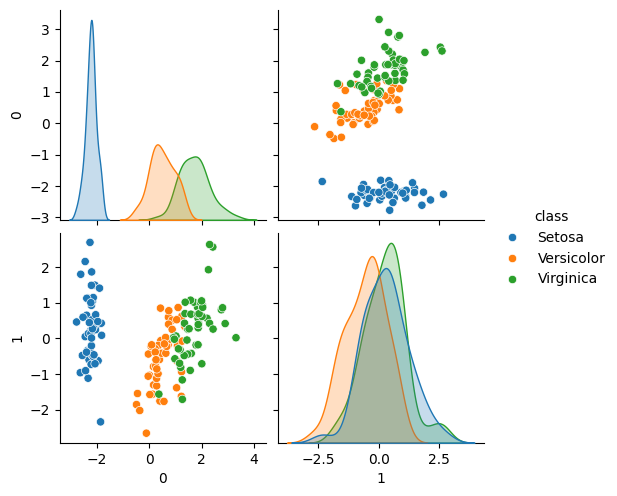

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# x will contain the fratures
x = iris.drop('class', axis=1)
# y will consyin the class
y = iris['class']

# Standardize the features
x = StandardScaler().fit_transform(x)

# Apply PCA keeping 95% of the variance
pca = PCA(0.95)
# fit_transform computes the PCA tranformation (fit) and applies it (transform)
principalComponents = pca.fit_transform(x)
print("Number of components:", pca.n_components_)
pcaDf = pd.DataFrame(data = principalComponents[:, :pca.n_components_])

# Concatenate with the class
finalDf = pd.concat([pcaDf, iris[['class']]], axis = 1)

# Visualize the results
sns.pairplot(finalDf, hue='class', diag_kind='kde')
plt.show()

We will also apply PCA keeping 99% of the variance:

Number of components: 3


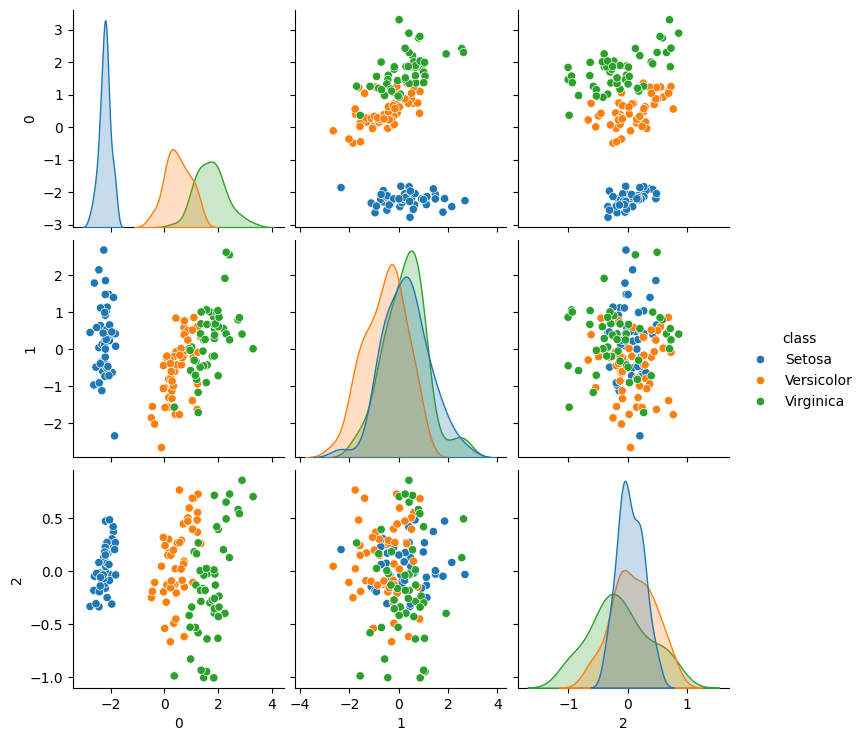

In [4]:
# Apply PCA keepin9 99% of the variance
pca = PCA(0.99)
principalComponents = pca.fit_transform(x)
print("Number of components:", pca.n_components_)
pcalDf = pd.DataFrame(data = principalComponents[:, :pca.n_components_])

# Concatenate with target the class
finalDf = pd.concat([pcalDf, iris[['class']]], axis = 1)

# Visualize the results
sns.pairplot(finalDf, hue='class', diag_kind='kde')
plt.show()

It is also possible to apply PCA by indicating a certain number of components instead of the variance we wish to preserve.

In [5]:
# Apply PCA keeping 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
print("Number of components:", pca.n_components_)

Number of components: 2


 The attribute **explained_variance_ratio_** contains the percentage of variance explained by each component:


In [6]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

This attribute can be useful for selecting the number of components we want to use. One strategy can be to plot the cumulative value of the variance versus the number of components. Let's load the wdbc dataset, which has 30 dimensions) and apply PCA.

In [7]:
url = 'https://raw.githubusercontent.com/AbrahamOtero/MLiB/main/datasets/wdbc.csv'
wdbc = pd.read_csv(url, header= None)

wdbc.describe(include = 'all')

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


As we can see, the ranges of the different attributes are very different. In this case, standardization before applying PCA is essential. In the case of the iris data set we may have skiped this step since all the sepal and petal lengths are a few centimeters; i.e., they have similar variances.

Number of dimensions needed to capture 95% of the variance: 10


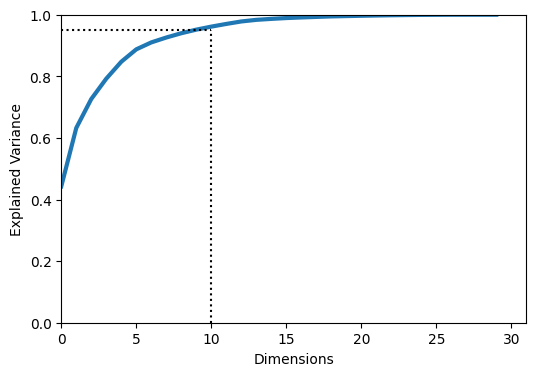

In [8]:
# Remove the nomical class; the second column
wdbc = wdbc.drop(wdbc.columns[1], axis=1)
# Remove the first column; it is an ID
wdbc = wdbc.drop(wdbc.columns[0], axis=1)

# Standarize the data
scaler = StandardScaler()
wdbc = scaler.fit_transform(wdbc)

# Apply PCA keeping all the components
pca = PCA()
principalComponents = pca.fit_transform(wdbc)

# Compute the cumulative variance vith np.cumsum
cumsum = np.cumsum(pca.explained_variance_ratio_)

# How many dimensions are needed to capture 95% of the variance?
dim = np.argmax(cumsum >= 0.95) + 1
print("Number of dimensions needed to capture 95% of the variance:", dim)

# Plot cumulative variance
plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 31, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([dim, dim], [0, 0.95], "k:")
plt.plot([0, dim], [0.95, 0.95], "k:")

##Numerize

To transform a nominal feature into a numerical feature we can use **OrdinalEncoder**. We are going to apply it on the iris data set to transform the nominal class into a class that is a number:


In [9]:
from sklearn.preprocessing import OrdinalEncoder

iris.info()

iris_metric_class= iris.copy()

ordinalEnc = OrdinalEncoder()

# Replace the nominal class by a metric value
iris_metric_class['class'] = ordinalEnc.fit_transform(iris_metric_class[['class']])
iris_metric_class.info()

#inspect the new metric class
iris_metric_class['class'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   class         150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


,count
class,
0.0,50
1.0,50
2.0,50


However, there is now an order relationship between the different Iris species, since they have been represented by the numbers 0, 1 and 2. Sometimes this may be the desired behavior (if the non-metric variable is ordinal), but this is not the case since there is no such order relationship between the species. In this case we should opt for a coding technique called **one hot ecoding** in which a set of binary variables are used to represent each of the possible labels of the original variable. We can achieve this with the **get_dumies** method of the Pandas DataFrames:



In [10]:
# One-hot encode the 'class' column using pd.get_dummies
iris_onehot = pd.get_dummies(iris, columns=['class'])

# Display the modified DataFrame; now we have 3 neww variables
print(iris_onehot.head())


   sepal.length  sepal.width  petal.length  petal.width  class_Setosa  \
0           5.1          3.5           1.4          0.2          True   
1           4.9          3.0           1.4          0.2          True   
2           4.7          3.2           1.3          0.2          True   
3           4.6          3.1           1.5          0.2          True   
4           5.0          3.6           1.4          0.2          True   

   class_Versicolor  class_Virginica  
0             False            False  
1             False            False  
2             False            False  
3             False            False  
4             False            False  


We can also accomplish this using **OneHotEncoder**:



In [11]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()

enc_df = pd.DataFrame(enc.fit_transform(iris[['class']]).toarray())

# Add the new columns to the original DataFrame
iris_onehot = iris.join(enc_df)

print(iris_onehot.columns)

# Let us use more friendly names for new columns
iris_onehot = iris_onehot.rename(columns={0: 'class_Setosa'})
iris_onehot = iris_onehot.rename(columns={1: 'class__Versicolor'})
iris_onehot = iris_onehot.rename(columns={2: 'class_Virginica'})

# Delete the original class column
iris_onehot = iris_onehot.drop('class', axis=1)

iris_onehot.head()

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'class',
       0, 1, 2],
      dtype='object')


,sepal.length,sepal.width,petal.length,petal.width,class_Setosa,class__Versicolor,class_Virginica
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,1.0,0.0,0.0


##Discretization

Let's discretize the metric attributes of the iris data set using an equally spaced bin (strategy='uniform') with **KBinsDiscretizer**:

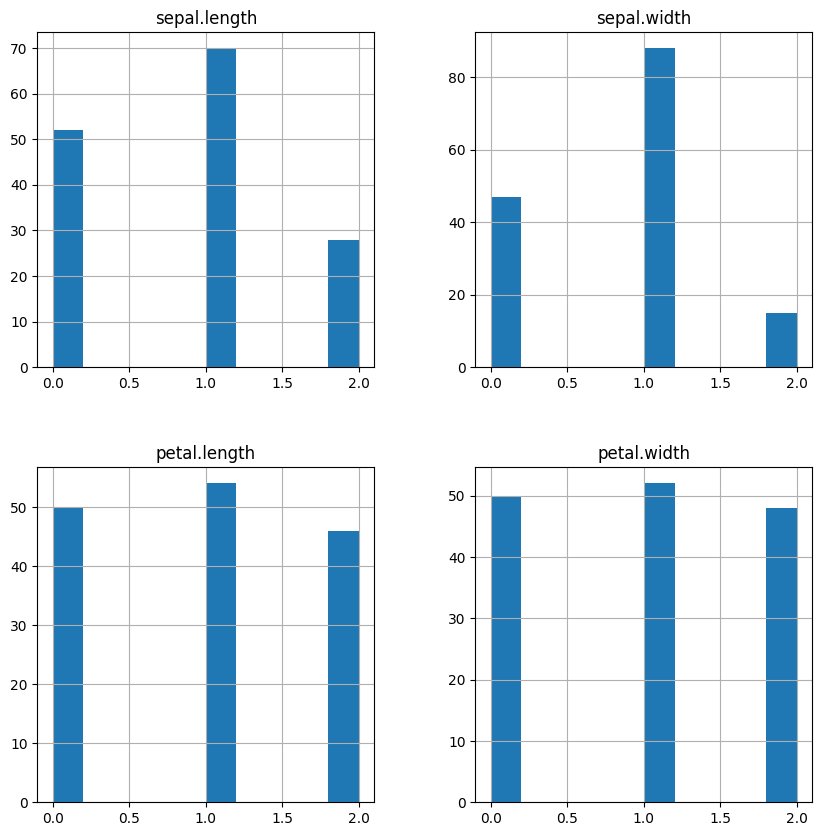

In [12]:
from sklearn.preprocessing import KBinsDiscretizer

# Discretize the features with equal sapced bins; in this case we do not want one hor encoding but ordinal
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
iris_discretized = iris.copy()
iris_discretized[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']] = est.fit_transform(iris_discretized[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']])

# Plot histograms of the discretized features
iris_discretized.hist(figsize=(10, 10))
plt.show()


Let's discretize the attributes using equally density bins (strategy='quantile'):

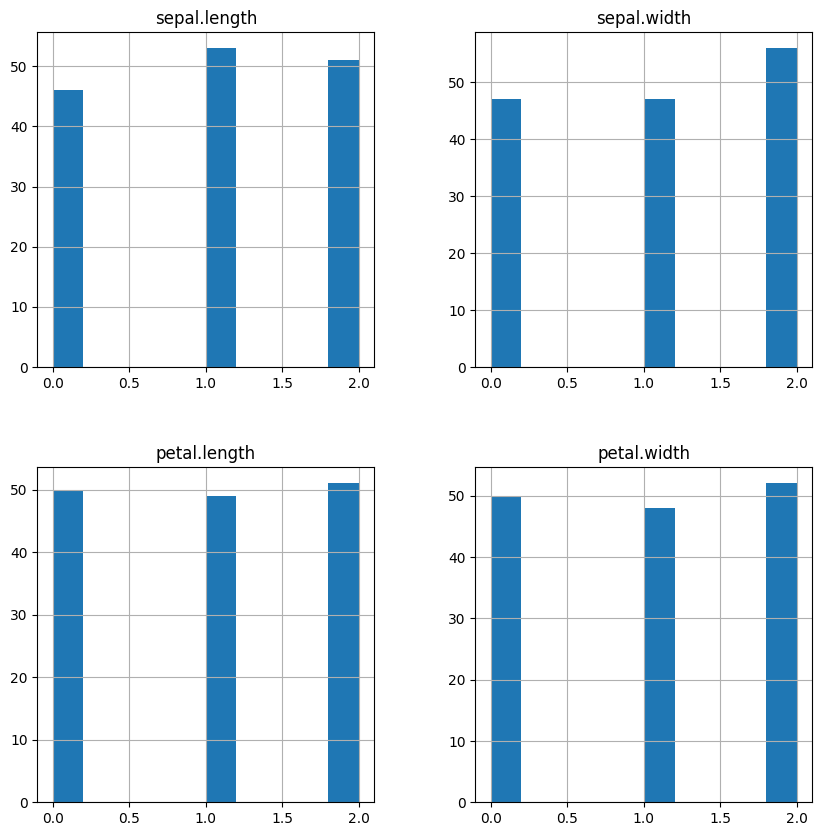

In [13]:
# Discretize the features with equal density bins
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
iris_discretized = iris.copy()
iris_discretized[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']] = est.fit_transform(iris_discretized[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']])

# Plot histograms of the discretized features
iris_discretized.hist(figsize=(10, 10))
plt.show()

##Normalization

To normalize values ​​between a minimum and maximum value we can use **MinMaxScaler**; by default the minimum and maximun values ​​are 0 and 1. We will apply this normalization to the attributes of the iris dataset.

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Show statistics before normalization
print("Statistics before normalization:")
print(iris.describe())

# Create a MinMaxScaler object
scaler = MinMaxScaler()

iris_normalized = iris.copy()

# Select the columns to normalize (all columns except 'class')
columns_to_normalize = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']

# Fit the scaler to the selected columns and transform the data;
# then replace the original columns with the normalized ones
iris_normalized[columns_to_normalize] = scaler.fit_transform(iris_normalized[columns_to_normalize])

# Show statistics after normalization
print("\nStatistics after normalization:")
print(iris_normalized.describe())


Statistics before normalization:
       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Statistics after normalization:
       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       0.428704     0.440556      0.467458     0.458056
std        0.230018     0.181611      0.299203     0.317599
min        0.000000     0.000000      0.000000     0.000000
25%        0.222222     0.333333      0.101695     0.083333
50%        0.416667     0.416667  

In a similar way we can use **StandardScaler** to standardize the features:

In [15]:
# Show statistics before standardization
print("Statistics before standardization:")
print(iris.describe())

iris_standarized = iris.copy()

# Create a StandardScaler object
scaler = StandardScaler()

# Select the columns to standardize (all columns except 'class')
columns_to_standardize = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']

# Fit the scaler to the selected columns and transform the data
iris_standarized[columns_to_standardize] = scaler.fit_transform(iris_standarized[columns_to_standardize])

# Show statistics after standardization
print("\nStatistics after standardization:")
print(iris_standarized.describe())


Statistics before standardization:
       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Statistics after standardization:
       sepal.length   sepal.width  petal.length   petal.width
count  1.500000e+02  1.500000e+02  1.500000e+02  1.500000e+02
mean  -4.736952e-16 -7.815970e-16 -4.263256e-16 -4.736952e-16
std    1.003350e+00  1.003350e+00  1.003350e+00  1.003350e+00
min   -1.870024e+00 -2.433947e+00 -1.567576e+00 -1.447076e+00
25%   -9.006812e-01 -5.923730e-01 -1.226552e+00 -1.183812e+00
50%   -5.250608e-0

## Sampling

To sample without replacement we can use a data frame method called **sample** to which we pass the proportion of samples we want:

In [16]:
iris_sample = iris.sample(frac=0.5, random_state=42)  # random_state for reproducibility

print("Statistics of the original dataset:")
print(iris.describe())

print("\nStatistics of the sampled dataset:")
print(iris_sample.describe())


Statistics of the original dataset:
       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Statistics of the sampled dataset:
       sepal.length  sepal.width  petal.length  petal.width
count     75.000000    75.000000     75.000000    75.000000
mean       5.838667     3.121333      3.605333     1.120000
std        0.830645     0.469989      1.822524     0.773374
min        4.400000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.500000     0.250000
50%        5.700000     3.10

The same method can be used to perform sampling with replacement if we pass the parameter **replace=true**:

In [17]:
iris_sample_replacement = iris.sample(frac=1.5, replace=True, random_state=42)

print("Statistics of the original dataset:")
print(iris.describe())

print("\nStatistics of the sampled dataset:")
print(iris_sample.describe())


Statistics of the original dataset:
       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Statistics of the sampled dataset:
       sepal.length  sepal.width  petal.length  petal.width
count     75.000000    75.000000     75.000000    75.000000
mean       5.838667     3.121333      3.605333     1.120000
std        0.830645     0.469989      1.822524     0.773374
min        4.400000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.500000     0.250000
50%        5.700000     3.10

Now we will sample the iris dataset in such a way that half of the obtained instances belong to the class Setosa, 25% to Versicolor and the other 25% to Virginica. The sample size will be 60% of the original data size.

In [18]:
# Calculate the number of samples for each class
n_samples = len(iris) * 0.6
n_setosa = int(n_samples * 0.5)
n_versicolor = int(n_samples * 0.25)
n_virginica = int(n_samples * 0.25)

# Sample from each class with its own proportion
setosa_samples = iris[iris['class'] == 'Setosa'].sample(n_setosa, random_state=42)
versicolor_samples = iris[iris['class'] == 'Versicolor'].sample(n_versicolor, random_state=42)
virginica_samples = iris[iris['class'] == 'Virginica'].sample(n_virginica, random_state=42)

# Concatenate the samples
iris_stratified_sample = pd.concat([setosa_samples, versicolor_samples, virginica_samples])

print("Distribution of classes in the original sample:")
print(iris['class'].value_counts())

print("\nDistribution of classes in the stratified sample:")
print(iris_stratified_sample['class'].value_counts())


Distribution of classes in the original sample:
class
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

Distribution of classes in the stratified sample:
class
Setosa        45
Versicolor    22
Virginica     22
Name: count, dtype: int64


## Adding new attributes created from the existing ones

We can generate new attributes by performing mathematical operations (such as applying a non-linear kernel) on the original attributes. Below we generate a new attribute which is the sum of the lengths and widths of the sepals and petals in the iris dataset:

In [19]:
iris_sum = iris.copy()
# Create a new column 'sum' as the sum of the four original attributes
iris_sum['sum'] = iris['sepal.length'] + iris['sepal.width'] + iris['petal.length'] + iris['petal.width']

print(iris_sum.head())


   sepal.length  sepal.width  petal.length  petal.width   class   sum
0           5.1          3.5           1.4          0.2  Setosa  10.2
1           4.9          3.0           1.4          0.2  Setosa   9.5
2           4.7          3.2           1.3          0.2  Setosa   9.4
3           4.6          3.1           1.5          0.2  Setosa   9.4
4           5.0          3.6           1.4          0.2  Setosa  10.2


Remember that a useful transformation when we have large tails in some attribute is to apply the logarithm or some other function that performs a non-linear compression. We are going to apply it on the length of the pepals, replacing in this case the original attribute by the transformed attribute:

   sepal.length  sepal.width  petal.length  petal.width   class
0           5.1          3.5      0.336472          0.2  Setosa
1           4.9          3.0      0.336472          0.2  Setosa
2           4.7          3.2      0.262364          0.2  Setosa
3           4.6          3.1      0.405465          0.2  Setosa
4           5.0          3.6      0.336472          0.2  Setosa


<Axes: xlabel='petal.length', ylabel='Count'>

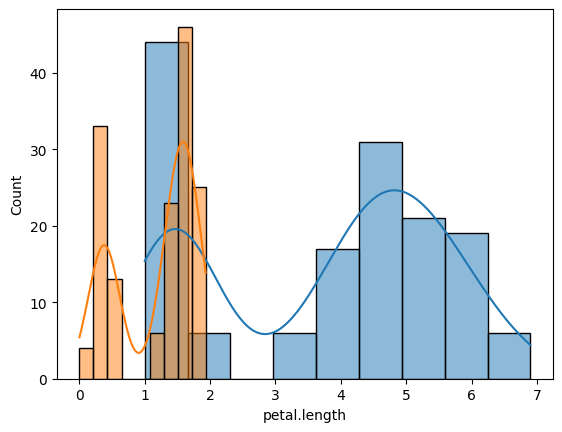

In [20]:
iris_log = iris.copy()

# Plot the original attribute
sns.histplot(iris['petal.length'], kde=True)

# Replace the petal width by its logarithm
iris_log['petal.length'] = np.log(iris_log['petal.length'])

print(iris_log.head())

# Plot the new log transform attribute
sns.histplot(iris_log['petal.length'], kde=True)

## Hanling missing values

We have three main possible strategies for handling missing values: removing the instances with missing values, removing the attribute that has many missing values, or imputing the missing values. Remember the lesson from theory: depending on whether those data are missing MCAR, MAR or MNAR the imputation strategy will vary.

We shall start by generating a version of the iris dataset in which 10%, 15%, 20%, and 60% of the data is missing in different columns. We will now apply each of the three possible strategies (using two different imputation modes for the last one) to these attributes. In this case, the strategies are used purely for illustrative purposes, with no real reason to prefer one or the other for each attribute (except perhaps in the case of eliminating the attribute with the most missing values).

In [21]:
# Create a copy of the iris dataset
iris_missing = iris.copy()

missing_rate=[0.1, 0.15, 0.2, 0.6]
# Iterate over each column and introduce missing values
for col in range(0,4):  # Exclude the 'class' column
  # Randomly select missing_rate of the indices to replace with NaN
  idx = np.random.choice(iris_missing.index, size=int(len(iris_missing) * missing_rate[col]), replace=False)
  iris_missing.iloc[idx, col] = np.nan

# Display the first few rows of the modified DataFrame
print(iris_missing.head())

# How many data are missing?
iris_missing.isnull().sum()


   sepal.length  sepal.width  petal.length  petal.width   class
0           5.1          3.5           1.4          NaN  Setosa
1           4.9          3.0           NaN          NaN  Setosa
2           NaN          3.2           1.3          NaN  Setosa
3           4.6          NaN           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


,0
sepal.length,15
sepal.width,22
petal.length,30
petal.width,90
class,0


In the case of the petals width we now have missing values ​​in more than 60% of the cases. Since they are missing very frequently, it might make sense to simply remove this data:

In [22]:
iris_missing = iris_missing.drop("petal.width", axis=1)

print(iris_missing.head())
#How many data are missing?
iris_missing.isnull().sum()

   sepal.length  sepal.width  petal.length   class
0           5.1          3.5           1.4  Setosa
1           4.9          3.0           NaN  Setosa
2           NaN          3.2           1.3  Setosa
3           4.6          NaN           1.5  Setosa
4           5.0          3.6           1.4  Setosa


,0
sepal.length,15
sepal.width,22
petal.length,30
class,0


Another possible strategy, only valid ifmising values ​​are MCAR, is to remove instances. We will apply this strategy for petal length, which means that we will have 150 - 30 equals 120 instances in the dataset.

In [23]:
#drop instances where petal length is missing
iris_missing = iris_missing.dropna(subset=['petal.length'])

iris_missing.info()

print(iris_missing.head())
#How many data are missing?
iris_missing.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  109 non-null    float64
 1   sepal.width   102 non-null    float64
 2   petal.length  120 non-null    float64
 3   class         120 non-null    object 
dtypes: float64(3), object(1)
memory usage: 4.7+ KB
   sepal.length  sepal.width  petal.length   class
0           5.1          3.5           1.4  Setosa
2           NaN          3.2           1.3  Setosa
3           4.6          NaN           1.5  Setosa
4           5.0          3.6           1.4  Setosa
5           5.4          3.9           1.7  Setosa


,0
sepal.length,11
sepal.width,18
petal.length,0
class,0


Especially when we don't have too much data, or when the data is not MCAR, the best strategy is to impute rather than to remove instances or attributes. The following code performs an imputation with **SimpleImputer** using the average (**'mean'**) value; other strategies such as the **'median'**, or '**most_frequent'** are also available; this last strategy can be used both for numerical values ​​(not very common for that type of data) and for nominal values ​​(much more common).

In [24]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer object to replace missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the 'sepal.width' column and transform the data

iris_missing['sepal.width'] = imputer.fit_transform(iris_missing[['sepal.width']])

# Check if there are still missing values in 'sepal.width'
iris_missing.isnull().sum()

,0
sepal.length,11
sepal.width,0
petal.length,0
class,0


The following code uses K nearest neighbor imputation; this imputation is based on similarity to other instances and usually provides better results than an imputation based on a statistic such as the mean or median.

In [25]:
from sklearn.impute import KNNImputer

# Create a KNNImputer object with k=5
imputer = KNNImputer(n_neighbors=5)

# Fit the imputer to the 'sepal.length' column and transform the data
iris_missing['sepal.length'] = imputer.fit_transform(iris_missing[['sepal.length']])

# Check if there are still missing values in 'sepal.length'
iris_missing.isnull().sum()

,0
sepal.length,0
sepal.width,0
petal.length,0
class,0


##Outlier detection

We will start this section by generating a version of the iris dataset that will contain a 5% outlier on each attribute.

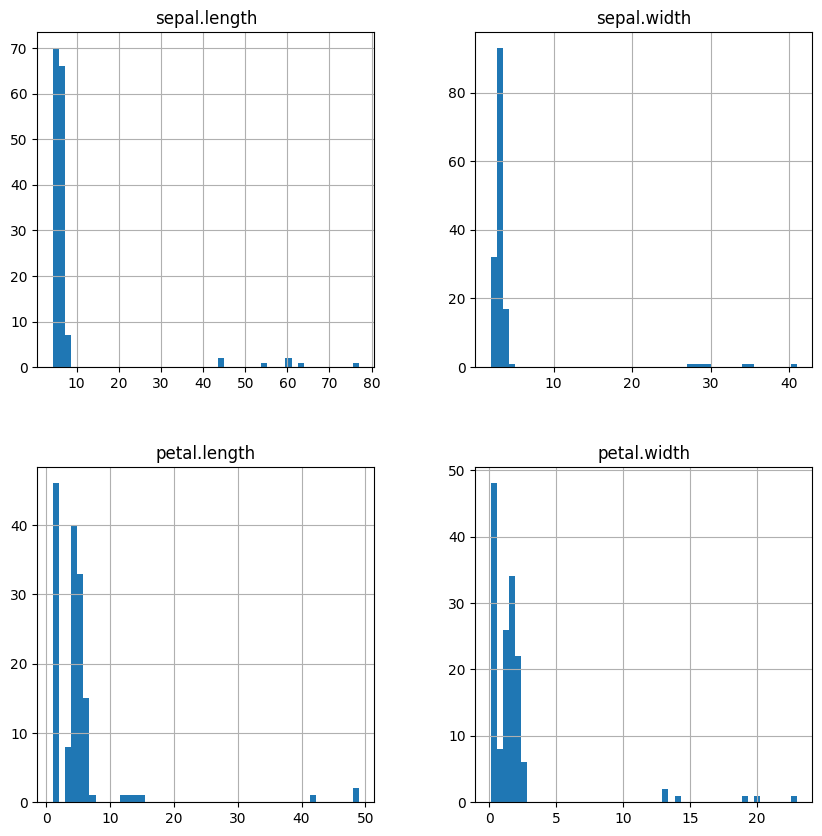

In [26]:
# Create a copy of the iris dataset
iris_outliers = iris.copy()

# Iterate over each column and introduce outliers
for col in iris_outliers.columns[:-1]:  # Exclude the 'class' column, the last one (-1)
    # Randomly select 5% (0.05) of the indices to introduce outliers
    idx = np.random.choice(iris_outliers.index, size=int(len(iris_outliers) * 0.05), replace=False)
    iris_outliers.loc[idx, col] *= 10  # Multiply the values by 10 to create outliers

# Plot histograms of each attribute
iris_outliers.hist(figsize=(10, 10), bins=50)
plt.show()


A typical strategy for identifying outliers is to look for data that are more than a certain number of standard deviations from the mean. In the following example, we will look for data that differ from the attribute mean by more than three standard deviations. Next, we would eliminate those outliers from the data set.

In [27]:
# Calculate the mean and standard deviation of each attribute
means = iris_outliers.mean(numeric_only=True)
stds = iris_outliers.std(numeric_only=True)

# Create a boolean mask to identify outliers
outliers_mask = (abs(iris_outliers.iloc[:, :4] - means) > 3 * stds).any(axis=1)

# Select data without outliers
iris_no_outliers = iris_outliers[~outliers_mask]

# Displays the number of outliers detected
print("Number of outliers:", outliers_mask.sum())

# Display the dataset without outliers
print(iris_no_outliers)


Number of outliers: 19
     sepal.length  sepal.width  petal.length  petal.width      class
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[131 rows x 5 columns]


If the outliers are extreme real values, and if we have decided that we are not going to consider these values ​​in our model but will handle them in another way, eliminating them from the data set is the best option. If these outliers are erroneous values, eliminating them is also an option, but in this case we can also consider correcting them using some imputation mechanism:

Outliers found in sepal.length : 7
Outliers found in sepal.width : 7
Outliers found in petal.length : 3
Outliers found in petal.width : 6


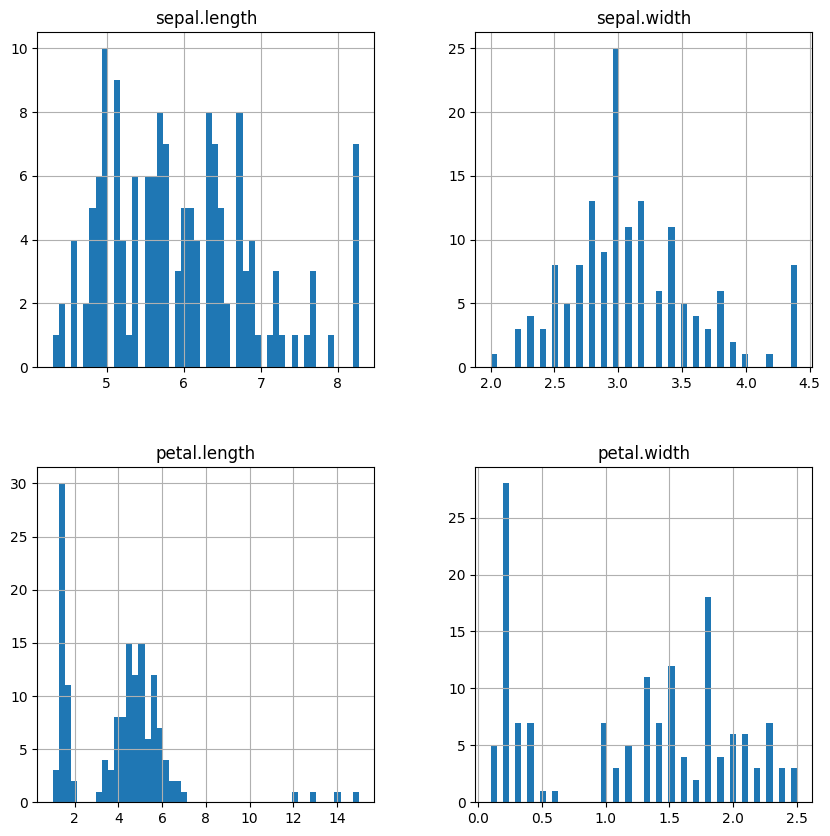

In [28]:
from sklearn.impute import KNNImputer

iris_outliers_inputed = iris_outliers.copy()

# Iterate over each column excluding the 'class'
for col in range(0,4):
   # We calculate the mean and standard deviation for the column we are processing
    mean = iris_outliers.iloc[:,col].mean(numeric_only=True)
    std = iris_outliers.iloc[:,col].std(numeric_only=True)
    # Compute the outliers mask
    outliers_mask = (abs(iris_outliers.iloc[:, col] - mean) > 3 * std)
    # How many outliers were found?
    print('Outliers found in', iris_outliers.columns[col], ':', outliers_mask.sum())
    # Replace them by the average
    iris_outliers_inputed.iloc[:,col] = np.where(outliers_mask, mean, iris_outliers.iloc[:,col])

 # Plot histograms of each attribute
iris_outliers_inputed.hist(figsize=(10, 10), bins=50)
plt.show()

#Exercises

Apply PCA on the wdbc dataset preserving 99% of the variance. How many components do you get?

In [29]:
# Your code goes here

Apply PCA on the wdbc dataset preserving 90% of the variance. How many components do you get?

In [30]:
# Your code goes here

Apply PCA on the wdbc dataset preserving 95% of the variance, but without standardizing the data first. How many components How many components do you get? What is going on?

In [31]:
# Your code goes here

Apply PCA properly on the wdbc dataset:

In [32]:
# Your code goes here

Load the Golf dataset. Numeriza the Wind attribute and the Humidity attribute using ORdinalEcoder.

In [33]:
# Your code goes here

Next, numerize the Outlook attribute and the Outlook attribute using OneHotEncoder.

In [34]:
# Your code goes here

Load the Diabetes dataset. Discretize the Blood Pressure and BMI attributes using 3 constant width bins.

In [35]:
# Your code goes here

Discretize and now the Glucose and Pregnancy attributes using 3 constant density bins.

In [36]:
# Your code goes here

Reload the original version of the Diabetes dataset. Normalize all of your metric attributes between 0 and 1 and display statistics for the dataset before and after normalization.

In [37]:
# Your code goes here

Now apply standardization on the diabetes dataset. Again, display statistics before and after the transformation.

In [38]:
# Your code goes here

Apply random sampling on the diabetes dataset to select half of the data.

In [39]:
# Your code goes here

Next, apply sampling with replacement to obtain a population with a size equal to twice the original.

In [40]:
# Your code goes here

Let's start with this version of the iris dataset with missing values:

In [41]:
iris = pd.read_csv('https://raw.githubusercontent.com/AbrahamOtero/MLiB/main/datasets/iris.csv')

# Create a copy of the iris dataset
iris_missing = iris.copy()

missing_rate=[0.05, 0.10, 0.15, 0.3]
# Iterate over each column and introduce missing values
for col in range(0,4):  # Exclude the 'class' column
  # Randomly select missing_rate of the indices to replace with NaN
  idx = np.random.choice(iris_missing.index, size=int(len(iris_missing) * missing_rate[col]), replace=False)
  iris_missing.iloc[idx, col] = np.nan

Remove all instances where the sepal length is missing. How many instances are left?

In [42]:
# Your code goes here

Impute the sepal width and petal length using the median value of each attribute with SimpleImputer.

In [43]:
# Your code goes here

Impute the petal width using KNNImputer.

In [44]:
# Your code goes here